In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, WhiteKernel
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.utils import estimator_html_repr
from sklearn.datasets import load_boston

Shape X: (20,), Y: (20,)


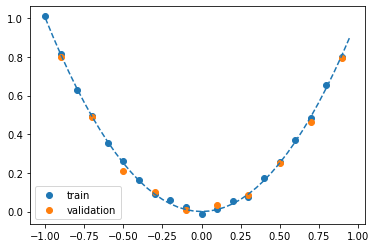

In [114]:
linsp = np.arange(-1, 1, 0.05)
X = np.arange(-1, 1, 0.1)
Y = X**2 + np.random.normal(0, 0.02, X.shape[0])

X_val = np.arange(-0.9, 1, 0.2)
Y_val = X_val**2 + np.random.normal(0, 0.02, X_val.shape[0])

print(f'Shape X: {X.shape}, Y: {Y.shape}')

plt.scatter(X, Y, label='train')
plt.scatter(X_val, Y_val, label='validation')
plt.plot(linsp, linsp**2, '--')
plt.legend()
plt.show()

# Grid Search

In [115]:
kernel = RBF()

model = GaussianProcessRegressor()

params_grid = {
    'alpha': [0.01, 0.1, 1],
    'kernel': [RBF(), Matern()]
}



In [116]:
grid_search = GridSearchCV(model, params_grid)
grid_search.fit(X.reshape(-1, 1), Y)
best_params = grid_search.best_params_

print('Best params:')
print(best_params)


Best params:
{'alpha': 0.01, 'kernel': RBF(length_scale=1)}


In [117]:
Y_pred, Y_pred_std = grid_search.best_estimator_.predict(linsp.reshape(-1, 1), return_std=True)


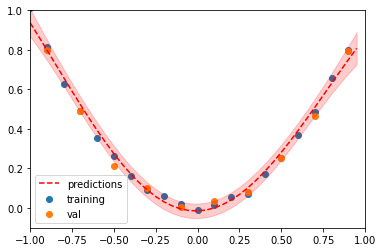

In [121]:
plt.scatter(X, Y, label='training')
plt.scatter(X_val, Y_val, label='val')
plt.plot(linsp, Y_pred, linestyle='dashed', color='red', label='predictions')
plt.fill_between(linsp, Y_pred + Y_pred_std, Y_pred - Y_pred_std, color='red', alpha=0.2)
plt.xlim([-1, 1])
plt.ylim([-0.1, 1])
plt.legend()
plt.show()